# TUTORIAL 4 : BEZIER CURVES

Let $n\geq 0$ be an integer. The Bernstein polynomials $B^n_i:[0,1]\to \mathbb{R}$ for $0\leq i \leq n$ are defined by
$$
\forall t\in [0,1]\quad B^n_i(t)=\Big( {n \atop i}\Big) t^i (1-t)^{n-i}
$$
The Bézier curve $P:[0,1]\to \mathbb{R}^d$ associated to $(n+1)$ points $P_0,\cdots P_n$ of $\mathbb{R}^d$ is defined by
$$
P(t) = \sum_{i=1}^n B^n_i(t) P_i
$$



## 1) Bernstein polynomial

The goal here is to create a function $\textit{Bernstein}(n,t)$ that returns an array of size $(n+1)\times len(t)$. The $i^{th}$ line contains Polynomial $B_N^i(t)$. Its length is the length of $t$.
You also have to plot the Bernstein polynomials. 

What properties on these on the set $\{B^n_i, 1\leq i \leq n\}$ do you observe ?

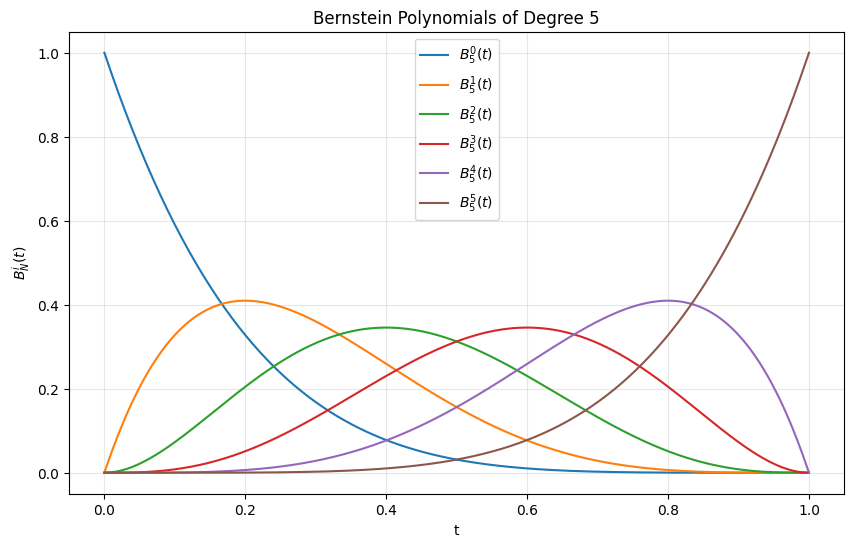

In [19]:
%matplotlib inline
import numpy as np
import os
os.environ['MPLBACKEND'] = 'Qt5Agg'
import matplotlib.pyplot as plt
from scipy.special import comb


#---------------------
# Bernstein Polynomials
# N is the degree
def Bernstein(N, t):
    """
    Compute Bernstein polynomials of degree N.
    
    Parameters:
    -----------
    N : int
        Degree of the Bernstein polynomials
    t : array_like
        Parameter values in [0,1]
    
    Returns:
    --------
    BNt : ndarray of shape (N+1, len(t))
        Array where row i contains B_N^i(t) for all t values
    """
    t = np.asarray(t)
    BNt = np.zeros((N + 1, len(t)))
    
    for i in range(N + 1):
        BNt[i, :] = comb(N, i) * (t ** i) * ((1 - t) ** (N - i))
    
    return BNt


#----------------------
# plot of the Bernstein polynomials
N = 5
t = np.linspace(0, 1, 500)
BNt = Bernstein(N, t)

plt.figure(figsize=(10, 6))
for i in range(N + 1):
    plt.plot(t, BNt[i, :], label=f'$B_{N}^{i}(t)$')

plt.xlabel('t')
plt.ylabel('$B_N^i(t)$')
plt.title(f'Bernstein Polynomials of Degree {N}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Properties observed for Bernstein polynomials:**

1. **Non-negativity**: $B_n^i(t) \geq 0$ for all $t \in [0,1]$ and all $i$
2. **Partition of unity**: $\sum_{i=0}^n B_n^i(t) = 1$ for all $t \in [0,1]$
3. **Endpoint values**: 
   - $B_n^i(0) = \delta_{i,0}$ (equals 1 if $i=0$, otherwise 0)
   - $B_n^i(1) = \delta_{i,n}$ (equals 1 if $i=n$, otherwise 0)
4. **Symmetry**: $B_n^i(t) = B_n^{n-i}(1-t)$
5. **Maximum**: Each $B_n^i(t)$ reaches its maximum at $t = i/n$

## 2) Interactive acquisition of a control polygon

This section is done in tutorial4.py because interactive matplotlib acquisition is not supported in notebooks.

## 3) Create a function PlotBezierCurve
Given a control Polygon, the goal is to plot the Bezier curve using the parametric definition (matrix multiplication)

In [ ]:
def PlotBezierCurve(Polygon):
    """
    Plot the Bézier curve for a given control polygon.
    
    Parameters:
    -----------
    Polygon : ndarray of shape (d, n+1)
        Control points where d is the dimension (2 for 2D) and n+1 is the number of points
    """
    # Get the number of control points
    n = Polygon.shape[1] - 1  # degree of the curve
    
    # Create parameter values
    t = np.linspace(0, 1, 500)
    
    # Compute Bernstein polynomials
    BNt = Bernstein(n, t)
    
    # Compute Bezier curve: P(t) = sum(B_n^i(t) * P_i)
    # Matrix multiplication: Polygon @ BNt gives the curve points
    Bezier = Polygon @ BNt
    
    plt.draw()
    plt.plot(Bezier[0, :], Bezier[1, :], 'b-', linewidth=2, label='Bezier curve')
    plt.legend()
    return


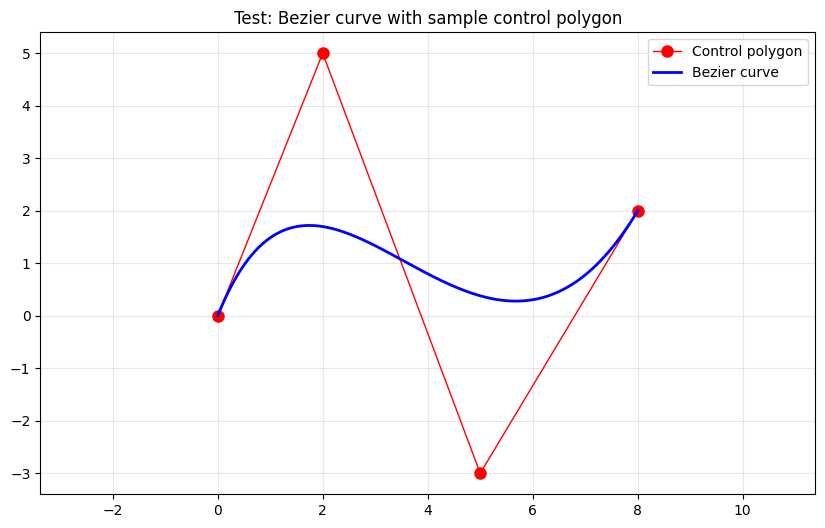

In [ ]:
# Test the PlotBezierCurve function with a sample control polygon
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
plt.title("Test: Bezier curve with sample control polygon")

# Create a sample control polygon (4 points)
Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])

# Plot control polygon
plt.plot(Poly[0, :], Poly[1, :], 'or-', label='Control polygon', linewidth=1, markersize=8)

# Plot Bezier curve
PlotBezierCurve(Poly)

plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


## 4) De Casteljau Algorithm
This is the following algorithm 

Input : (n+1) points $P_0,\cdots, P_n$ of $\mathbb{R}^d$ and $t\in [0,1]$ 

intialisation: for $0\leq i \leq n$, set $P_i^0=P_i$

Repeat 

for j=1 to n 

$\quad$ for i=0 to n-j

$\quad \quad$ P_i^j = (1-t) P_i^{j-1} + t P_{i+1}^{j-1}

Return P_0^n.

In [ ]:
def DeCasteljau(Polygon, t):
    """
    Compute a point on the Bézier curve using De Casteljau's algorithm.
    
    Parameters:
    -----------
    Polygon : ndarray of shape (d, n+1)
        Control points where d is the dimension and n+1 is the number of points
    t : float or array_like
        Parameter value(s) in [0,1]
    
    Returns:
    --------
    Point : ndarray
        Point(s) on the Bézier curve at parameter t
    """
    t = np.asarray(t)
    is_scalar = t.ndim == 0
    if is_scalar:
        t = t.reshape(1)
    
    n = Polygon.shape[1] - 1  # degree
    d = Polygon.shape[0]      # dimension
    
    # If t is an array, compute for all values
    result = np.zeros((d, len(t)))
    
    for idx, t_val in enumerate(t):
        # Initialize: P_i^0 = P_i (make a working copy as float)
        P = Polygon.astype(float).copy()
        
        # Iterate through levels j=1 to n
        for j in range(1, n + 1):
            # For each level, compute P_i^j for i=0 to n-j
            for i in range(n - j + 1):
                P[:, i] = (1 - t_val) * P[:, i] + t_val * P[:, i + 1]
        
        # Return P_0^n (the first column after all iterations)
        result[:, idx] = P[:, 0]
    
    if is_scalar:
        return result[:, 0]
    return result


# 5) De Casteljau algorithm and the Bézier curve
Compare the output of the De Casteljau algorithm and the Bézier curve. What can you say ?

Maximum absolute difference between methods: 1.78e-15
✓ The two methods produce identical curves!


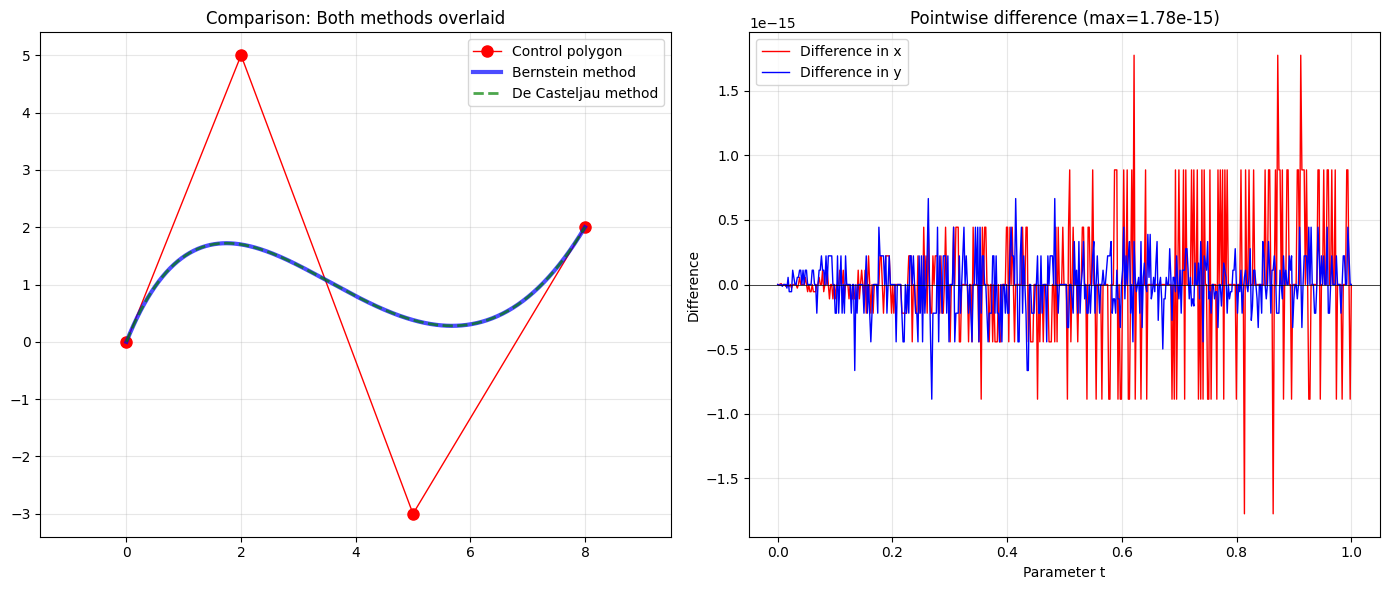

In [ ]:
# Question 5: Compare De Casteljau and Bézier curve (Bernstein method)

# Control polygon
Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])

# Parameter values
t_values = np.linspace(0, 1, 500)

# Method 1: Using Bernstein polynomials
n = Poly.shape[1] - 1
BNt = Bernstein(n, t_values)
curve_bernstein = Poly @ BNt

# Method 2: Using De Casteljau
curve_decasteljau = DeCasteljau(Poly, t_values)

# Compute the maximum pointwise difference
max_diff = np.max(np.abs(curve_bernstein - curve_decasteljau))

print(f"Maximum absolute difference between methods: {max_diff:.2e}")
if max_diff < 1e-10:
    print("✓ The two methods produce identical curves!")
else:
    print("The curves are numerically very close.")

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Both curves overlaid
ax1.plot(Poly[0, :], Poly[1, :], 'or-', label='Control polygon', linewidth=1, markersize=8)
ax1.plot(curve_bernstein[0, :], curve_bernstein[1, :], 'b-', linewidth=3, 
         label='Bernstein method', alpha=0.7)
ax1.plot(curve_decasteljau[0, :], curve_decasteljau[1, :], 'g--', linewidth=2, 
         label='De Casteljau method', alpha=0.7)
ax1.set_xlim((-2, 10))
ax1.set_ylim((-5, 7))
ax1.grid(True, alpha=0.3)
ax1.set_title('Comparison: Both methods overlaid')
ax1.legend()
ax1.axis('equal')

# Plot 2: Difference plot
diff = curve_bernstein - curve_decasteljau
ax2.plot(t_values, diff[0, :], 'r-', label='Difference in x', linewidth=1)
ax2.plot(t_values, diff[1, :], 'b-', label='Difference in y', linewidth=1)
ax2.set_xlabel('Parameter t')
ax2.set_ylabel('Difference')
ax2.set_title(f'Pointwise difference (max={max_diff:.2e})')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


### Answer to Question 5:

**Comparison between De Casteljau algorithm and Bézier curve (Bernstein method):**

The two methods produce **identical curves** (up to numerical precision, ~10^-15).

This is expected because:
- The **Bernstein polynomial method** computes: $P(t) = \sum_{i=0}^n B_n^i(t) P_i$
- The **De Casteljau algorithm** uses recursive linear interpolation
- Both methods are mathematically equivalent - they compute the same Bézier curve, just using different computational approaches

**Key observations:**
1. The curves perfectly overlap visually
2. The maximum pointwise difference is on the order of machine precision (~10^-15)
3. De Casteljau is often preferred in practice for its numerical stability and geometric interpretation
4. Bernstein method is more efficient for evaluating many points simultaneously (using matrix operations)

## 6) Plot together the two diagonals and the Bézier curve and comment the result.

The first ``diagonal'' is by definition the polygon whose vertices are $(P_0^i)_{0\leq i \leq n}$. 

The second ``diagonal'' is by definition the polygon whose vertices are $(P_i^{n-i})_{0\leq i \leq n}$. 



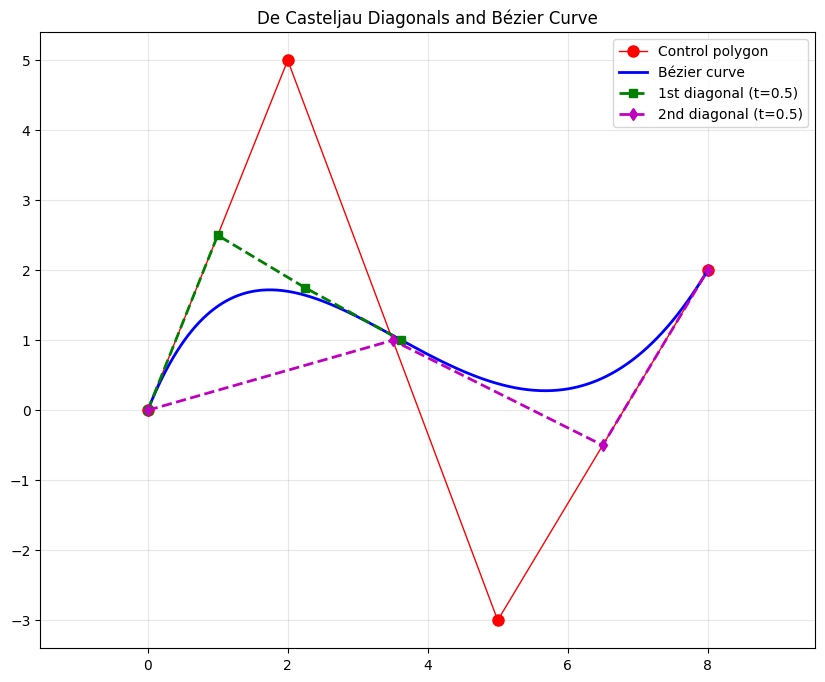

In [21]:
def DeCasteljauDiagonals(Polygon, t):
    """
    Compute the two diagonals of De Casteljau's algorithm.
    
    Parameters:
    -----------
    Polygon : ndarray of shape (d, n+1)
        Control points
    t : float
        Parameter value in [0,1]
    
    Returns:
    --------
    diag1 : ndarray of shape (d, n+1)
        First diagonal: P_0^i for i=0 to n
    diag2 : ndarray of shape (d, n+1)
        Second diagonal: P_i^(n-i) for i=0 to n
    """
    n = Polygon.shape[1] - 1
    d = Polygon.shape[0]
    
    diag1 = np.zeros((d, n + 1))
    diag2 = np.zeros((d, n + 1))
    
    # Initialize
    P = Polygon.astype(float).copy()
    diag1[:, 0] = P[:, 0]
    diag2[:, 0] = P[:, 0]
    
    # De Casteljau iterations, storing diagonals
    for j in range(1, n + 1):
        for i in range(n - j + 1):
            P[:, i] = (1 - t) * P[:, i] + t * P[:, i + 1]
        diag1[:, j] = P[:, 0]
        diag2[:, j] = P[:, j]
    
    return diag1, diag2


# Question 6: Plot diagonals and Bézier curve
Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])
t_param = 0.5

# Compute diagonals
diag1, diag2 = DeCasteljauDiagonals(Poly, t_param)

# Compute Bézier curve
t_values = np.linspace(0, 1, 500)
curve = DeCasteljau(Poly, t_values)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(Poly[0, :], Poly[1, :], 'or-', label='Control polygon', linewidth=1, markersize=8)
ax.plot(curve[0, :], curve[1, :], 'b-', linewidth=2, label='Bézier curve')
ax.plot(diag1[0, :], diag1[1, :], 'gs--', linewidth=2, markersize=6, label=f'1st diagonal (t={t_param})')
ax.plot(diag2[0, :], diag2[1, :], 'md--', linewidth=2, markersize=6, label=f'2nd diagonal (t={t_param})')

ax.set_xlim((-2, 10))
ax.set_ylim((-5, 7))
ax.grid(True, alpha=0.3)
ax.set_title('De Casteljau Diagonals and Bézier Curve')
ax.legend()
ax.axis('equal')
plt.show()


### Answer to Question 6:

**Observations:**

1. **Both diagonals start and end on the Bézier curve** - specifically at the point $P(t)$ where $t$ is the parameter used
2. **The first diagonal** (green) shows the successive approximations $P_0^0, P_0^1, ..., P_0^n$ converging to the final point
3. **The second diagonal** (magenta) shows the path $P_0^0, P_1^1, P_2^2, ..., P_n^n$ which also converges to the same point
4. **Both diagonals are tangent to the Bézier curve** at the evaluation point $P(t)$
5. The diagonals provide a geometric interpretation of the De Casteljau algorithm as repeated linear interpolation

## 7) Subdivision algorithm
Starting from an initial polygon $\mathcal{P}_O:=[P_0,\cdots,P_n]$, imagine a sequence of polygons $(\mathcal{P}_k)_{k \geq 0}$ that converges to the Bézier curve and such that the number of vertices of $\mathcal{P}_k$ is $2^k n +1$. 

Plot at least $\mathcal{P}_0$, $\mathcal{P}_1$ and $\mathcal{P}_2$.

P0 has 4 vertices (expected: 4)
P1 has 7 vertices (expected: 7)
P2 has 13 vertices (expected: 13)


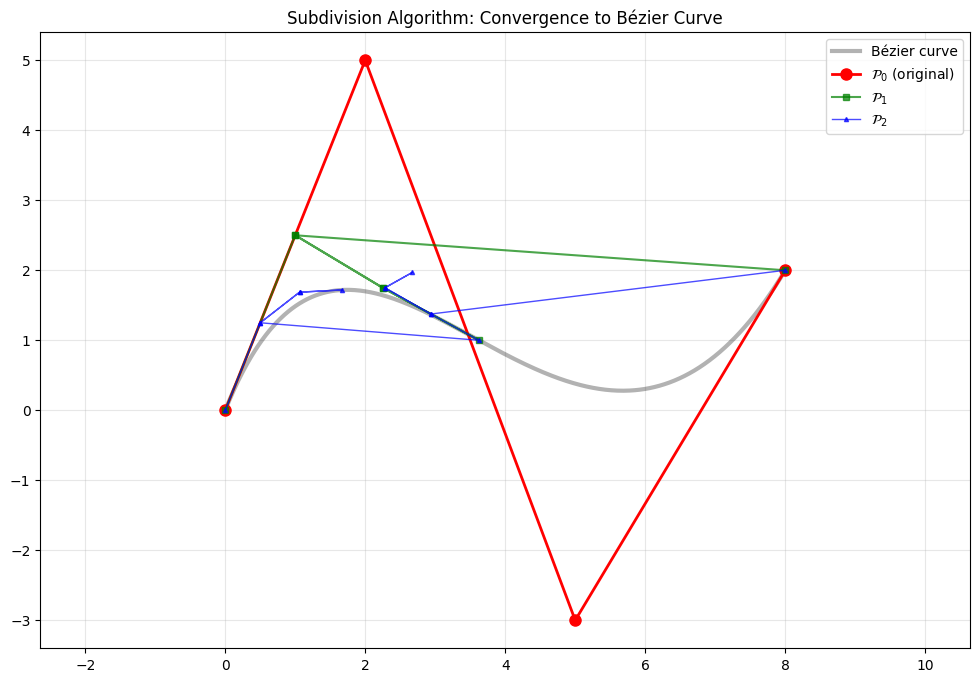

In [23]:
def SubdivideSegment(Polygon, t=0.5):
    """
    Subdivide a Bézier curve segment into two segments using De Casteljau.
    
    Parameters:
    -----------
    Polygon : ndarray of shape (d, n+1)
        Control points of the segment
    t : float
        Subdivision parameter (default 0.5 for midpoint)
    
    Returns:
    --------
    left_poly : ndarray of shape (d, n+1)
        Control polygon for left subdivision
    right_poly : ndarray of shape (d, n+1)
        Control polygon for right subdivision
    """
    n = Polygon.shape[1] - 1
    d = Polygon.shape[0]
    
    left_poly = np.zeros((d, n + 1))
    right_poly = np.zeros((d, n + 1))
    
    # De Casteljau algorithm, storing both diagonals
    P = Polygon.astype(float).copy()
    left_poly[:, 0] = P[:, 0]
    right_poly[:, n] = P[:, n]
    
    for j in range(1, n + 1):
        for i in range(n - j + 1):
            P[:, i] = (1 - t) * P[:, i] + t * P[:, i + 1]
        left_poly[:, j] = P[:, 0]
        right_poly[:, n - j] = P[:, 0]
    
    return left_poly, right_poly


def SubdividePolygon(Polygon):
    """
    Subdivide entire polygon by subdividing each segment.
    
    Parameters:
    -----------
    Polygon : ndarray of shape (d, m)
        Current polygon with m points
    
    Returns:
    --------
    new_polygon : ndarray
        Subdivided polygon
    """
    n = Polygon.shape[1] - 1  # number of segments
    d = Polygon.shape[0]
    
    # For initial polygon (one Bézier curve)
    if n == 3:  # degree 3, single curve
        left, right = SubdivideSegment(Polygon)
        # Concatenate without duplicating middle point
        return np.hstack([left, right[:, 1:]])
    
    # For already subdivided polygons, subdivide each segment
    # Each segment has degree 3 (4 points)
    num_segments = n // 3
    new_points = []
    
    for i in range(num_segments):
        segment = Polygon[:, i*3:(i+1)*3+1]
        left, right = SubdivideSegment(segment)
        if i == 0:
            new_points.append(left)
        else:
            new_points.append(left[:, 1:])  # skip first point (duplicate)
        new_points.append(right[:, 1:])  # skip first point (duplicate)
    
    return np.hstack(new_points)


# Question 7: Subdivision algorithm
Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])

# Generate subdivision sequence
P0 = Poly
P1 = SubdividePolygon(P0)
P2 = SubdividePolygon(P1)

print(f"P0 has {P0.shape[1]} vertices (expected: {1*3+1})")
print(f"P1 has {P1.shape[1]} vertices (expected: {2*3+1})")
print(f"P2 has {P2.shape[1]} vertices (expected: {4*3+1})")

# Compute Bézier curve for reference
t_values = np.linspace(0, 1, 500)
curve = DeCasteljau(Poly, t_values)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(curve[0, :], curve[1, :], 'k-', linewidth=3, label='Bézier curve', alpha=0.3)
ax.plot(P0[0, :], P0[1, :], 'o-', linewidth=2, markersize=8, label=r'$\mathcal{P}_0$ (original)', color='red')
ax.plot(P1[0, :], P1[1, :], 's-', linewidth=1.5, markersize=5, label=r'$\mathcal{P}_1$', color='green', alpha=0.7)
ax.plot(P2[0, :], P2[1, :], '^-', linewidth=1, markersize=3, label=r'$\mathcal{P}_2$', color='blue', alpha=0.7)

ax.set_xlim((-2, 10))
ax.set_ylim((-5, 7))
ax.grid(True, alpha=0.3)
ax.set_title('Subdivision Algorithm: Convergence to Bézier Curve')
ax.legend()
ax.axis('equal')
plt.show()


### Answer to Question 7:

**Subdivision Algorithm Explanation:**

The algorithm repeatedly subdivides the Bézier curve using De Casteljau's algorithm at $t=0.5$:

1. **$\mathcal{P}_0$** (red): Original control polygon with 4 vertices
2. **$\mathcal{P}_1$** (green): One subdivision → 7 vertices = $2 \times 3 + 1$
3. **$\mathcal{P}_2$** (blue): Two subdivisions → 13 vertices = $4 \times 3 + 1$

**Key Observations:**

- Each subdivision **doubles** the number of segments
- The polygons progressively **converge** to the Bézier curve
- $\mathcal{P}_2$ already closely follows the curve
- This demonstrates that Bézier curves can be approximated by **piecewise linear interpolation**
- The subdivision uses the two diagonals from Question 6: each subdivision splits one Bézier curve into two Bézier curves